```
# LOAD THE PACKAGES:
library(deSolve)
library(reshape2)
some code
library(ggplot2)



# Solution: SIR model with a dynamic force of infection

The differential equations for an SIR model with a dynamic force of infection are:  

\begin{align}
\frac{dS}{dt} & = -\beta \frac{I}{N} S \\
\\
\frac{dI}{dt} & = \beta \frac{I}{N} S - \gamma I \\
\\
\frac{dR}{dt} & = \gamma I
\end{align}

Some assumptions inherent in this model structure are:  
- a homogeneous population - everyone in the same compartment is subject to the same hazards
- a well-mixed population - all susceptible people have the same risk as getting infected, dependent on the number of infected people
- a closed population - there are no births or deaths, so the population size stays constant

In [1]:
# LOAD THE PACKAGES:
library(deSolve)
library(reshape2)
library(ggplot2)

# MODEL INPUTS:

# Vector storing the initial number of people in each compartment (at timestep 0)
initial_state_values <- c(S = 999999,  # the whole population we are modelling is susceptible to infection
                          I = 1,       # the epidemic starts with a single infected person
                          R = 0)       # there is no prior immunity in the population

# Vector storing the parameters describing the transition rates in units of days^-1
parameters <- c(beta = 1,      # the infection rate, which acts on susceptibles
                gamma = 0.1)   # the rate of recovery, which acts on those infected

# TIMESTEPS:

# Vector storing the sequence of timesteps to solve the model at
times <- seq(from = 0, to = 60, by = 1)   # from 0 to 60 days in daily intervals

# SIR MODEL FUNCTION: 

# The model function takes as input arguments (in the following order): time, state and parameters
sir_model <- function(time, state, parameters) {  

    with(as.list(c(state, parameters)), {  # tell R to unpack variable names from the state and parameters inputs    
        
    # New: calculating the total population size N (the sum of the number of people in each compartment)
      N <- S+I+R
      
    # New: defining lambda as a function of beta and I:
      lambda <- beta * I/N
    # Another option is simply replacing lambda with this expression in the differential equations below
        
    # The differential equations
      dS <- -lambda * S               # people move out of (-) the S compartment at a rate lambda (force of infection)
      dI <- lambda * S - gamma * I    # people move into (+) the I compartment from S at a rate lambda, 
                                      # and move out of (-) the I compartment at a rate gamma (recovery)
      dR <- gamma * I                 # people move into (+) the R compartment from I at a rate gamma
      
    # Return the number of people in the S, I and R compartments at each timestep 
    # (in the same order as the input state variables)
    return(list(c(dS, dI, dR))) 
    })
  
}

# MODEL OUTPUT (solving the differential equations):

# Solving the differential equations using the ode integration algorithm
output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = sir_model,
                            parms = parameters))

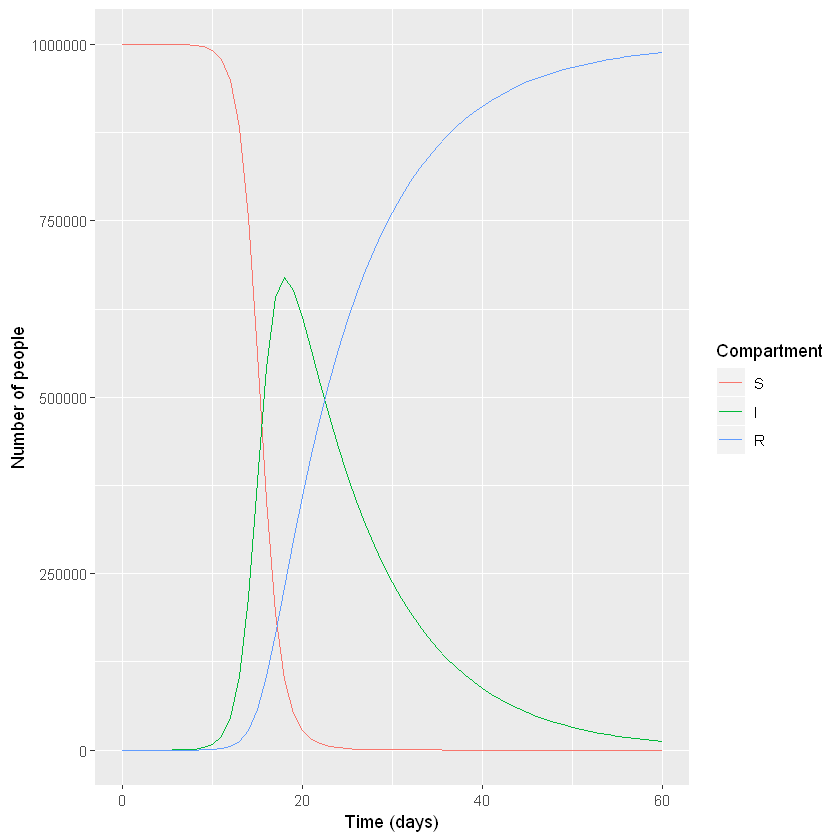

In [2]:
# Plotting the output
output_long <- melt(as.data.frame(output), id = "time")                  # turn output dataset into long format

ggplot(data = output_long,                                               # specify object containing data to plot
       aes(x = time, y = value, colour = variable, group = variable)) +  # assign columns to axes and groups
  geom_line() +                                                          # represent data as lines
  xlab("Time (days)")+                                                   # add label for x axis
  ylab("Number of people") +                                             # add label for y axis
  labs(colour = "Compartment")                                           # add legend title

### After how many days does the epidemic peak? What is the peak prevalence?

The peak of the epidemic occurs after 19 days, at which point around 670000 people are infected. This is easier to determine by looking at the output dataframe:

In [3]:
output[output$time == 19,]

,time,S,I,R
20,19,51602.45,651979,296418.6


### How does the pattern of the epidemic change under different assumptions for $\beta$ and $\gamma$, e.g. in terms of the peak of the epidemic, the number infected at the peak, and when the epidemic ends?

Loading required package: deSolve


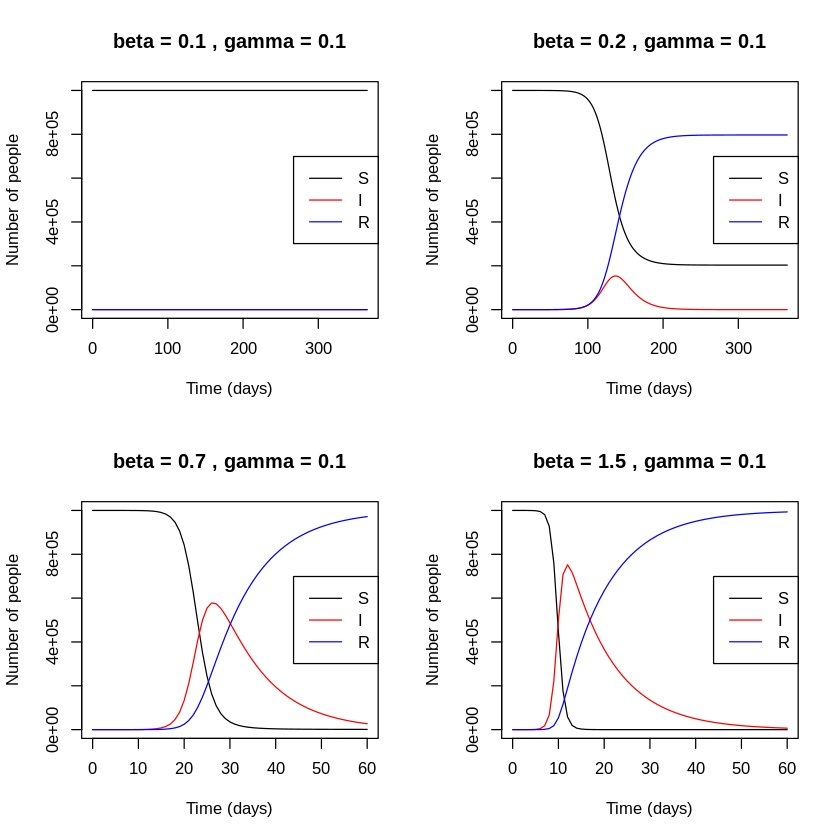

In [1]:
# Holding gamma constant at 0.1, varying beta between 0.1 and 1.5:
                   
source("../GraphicsAndData/w1_nb4_source_code.R")      # load external SIR modelling code
par(mfrow = c(2,2))  # Show 2*2 separate plots in one page (2 rows, 2 per row)
run_sir_model(beta = 0.1, gamma = 0.1, duration = 365)
run_sir_model(beta = 0.2, gamma = 0.1, duration = 365)
run_sir_model(beta = 0.7, gamma = 0.1, duration = 60)
run_sir_model(beta = 1.5, gamma = 0.1, duration = 60)
# Note the differing durations of the model run when comparing these plots

With $\gamma$ held constant at 0.1, an increasing value for $\beta$ leads to an earlier and higher peak of infected people. With a higher $\beta$, the peak is also "sharper", i.e. the epidemic also starts to decline again more quickly. A $\beta$ of 0.1 actually does not give rise to an epidemic: the number of susceptible, infected and recovered people stays the same as at the beginning.

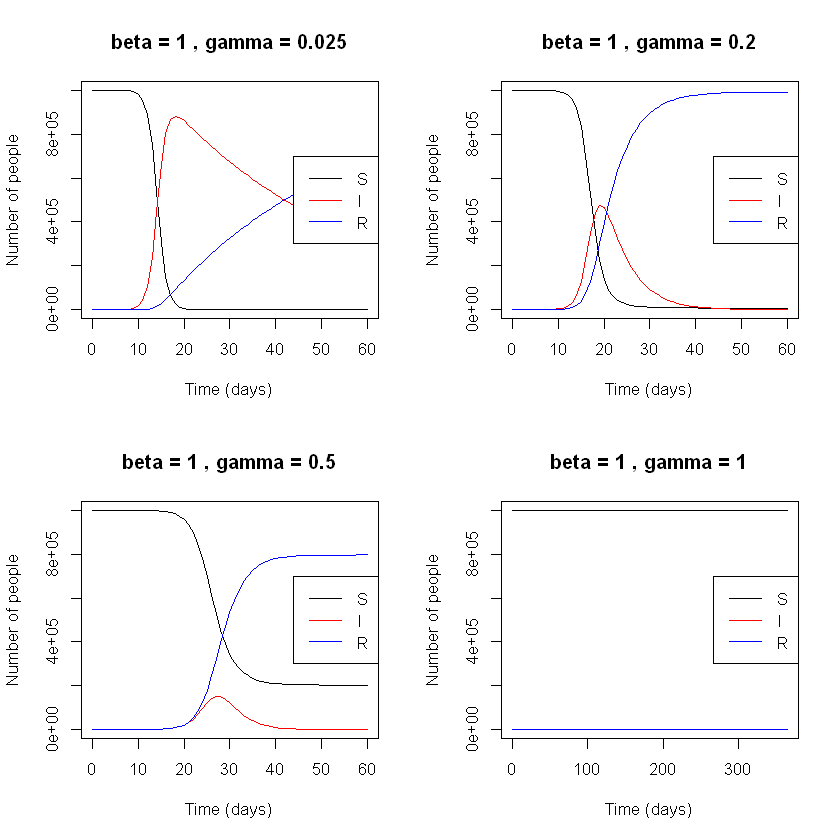

In [5]:
# Holding beta constant at 1, vary gamma between 0.025 and 1:

par(mfrow = c(2,2))                     
run_sir_model(beta = 1, gamma = 0.025, duration = 60)
run_sir_model(beta = 1, gamma = 0.2, duration = 60)
run_sir_model(beta = 1, gamma = 0.5, duration = 60)
run_sir_model(beta = 1, gamma = 1, duration = 365)

As you can see, different recovery rates affect the epidemic just as much as different forces of infection. With $\beta$ held constant at 1, an increasing value for $\gamma$ tends to lead to a later and lower peak of infected people, and an earlier rise in the recovered curve. If people can stay infected for a long time before recovering ($\gamma$ = 0.025, corresponding to an average duration of infection of 40 days), the number of infected people stays high over a longer period and declines slowly - the epidemic flattens out. In contrast, if recovery happens very quickly after infection ($\gamma$ = 0.5), there is a only small peak in the prevalence of infection and the epidemic dies out quickly. If *gamma* is as large as 1, no epidemic takes place after the introduction of 1 infected case.